# Homework 6 Template
## Cassandra Bodin


Template Provided by G. Besla & R. Li
Worked with: Madison, Sean, Mackenzie, Chirag

In [2]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
# Step 1: modify CenterOfMass so that COM_P now takes a parameter specifying 
# by how much to decrease RMAX instead of a factor of 2
from CenterOfMass2 import CenterOfMass



FileNotFoundError: [Errno 2] No such file or directory: 'MW_000.txt'

In [43]:
def OrbitCOM(galaxy,start,end,n):
    #function that loops over all the desired snapshots to compute the COM pos and vel as a function of time.
    
    #inputs:
    #galaxy, the name of the galaxy 
    #start, the number of the first snapshot to read in
    #end, the number of the last snapshot to read in
    #n, integer indicating the intervals over which we will return COM
    
    #returns: 
    # output file containing COM Positions and Velocity vectors of a galaxy in ea snapshot

    
    # compose the filename for output
    fileout='Orbit_%s.txt'%(galaxy)
    
    #  set tolerance and VolDec for calculating COM_P in CenterOfMass
    # for M33 that is stripped more, use different values for VolDec
    
    if galaxy=='M33':
        delta = 0.1
        VolDec=4
    else:
        delta = 0.1
        VolDec=2

    
    # generate the snapshot id sequence 
    # it is always a good idea to also check if the input is eligible (not required)
    snap_ids=np.arange(start,end,n)
    
    # initialize the array for orbital info: t, x, y, z, vx, vy, vz of COM
    orbit=np.zeros([len(snap_ids),7])
    
    # a for loop 
    for i, snap_id in enumerate(snap_ids): # loop over files
        
        # compose the data filename (be careful about the folder)
        #add a string of the filenumber to the value "000"
        ilbl= '000' +str(snap_id)
        #remove all but the last 3 digits
        ilbl=ilbl[-3:]
        filename="%s_"%(galaxy) + ilbl + '.txt'
        
        # Initialize an instance of CenterOfMass class, using disk particles
        COM = CenterOfMass(filename,2)       
        
        
        # Store the COM pos and vel. Remember that now COM_P required VolDec
        COMP=COM.COM_P(delta,VolDec)
        COMV=COM.COM_V(COMP[0],COMP[1],COMP[2]) 
    
        # store the time, pos, vel in ith element of the orbit array,  without units (.value) 
        # note that you can store 
        # a[i] = var1, *tuple(array1)
        time=COM.time.value/1000
        x=COMP[0].value
        y=COMP[1].value
        z=COMP[2].value
        vx=COMV[0].value
        vy=COMV[1].value
        vz=COMV[2].value

        orbit[i]=[time,x,y,z,vx,vy,vz]
        
        # print snap_id to see the progress
        print(snap_id)
    

    # write the data to a file
    # we do this because we don't want to have to repeat this process 
    # this code should only have to be called once per galaxy.
    np.savetxt(fileout, orbit, fmt = "%11.3f"*7, comments='#',
               header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                      .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))
    #return the orbit 
    return orbit

In [47]:
#Test

Test=OrbitCOM('MW',0,11,5)

print(Test)

0
5
10
[[ 0.        -2.04       3.1       -1.47       0.33       4.37
  -0.44     ]
 [ 0.0714286 -1.86       3.11      -1.46      -1.14       8.06
  -0.36     ]
 [ 0.142857  -1.9        3.23      -1.55      -3.26       9.13
  -0.93     ]]


In [59]:
# Recover the orbits and generate the COM files for each galaxy
# read in 800 snapshots in intervals of n=5


#Run the code ONLY once to get the 3 files needed, this will take a while

#OrbitMW=OrbitCOM('MW',0,800,5)
#OrbitM31=OrbitCOM('M31',0,800,5)
#OrbitM33=OrbitCOM('M33',0,800,5)

In [51]:
# Read in the data files for the orbits of each galaxy that you just created
# headers:  t, x, y, z, vx, vy, vz
# using np.genfromtxt

#Milky Way
#read in data files focusing on the time (columns 0)
#read in data files focusing on the positions x,y,z (columns 1,2,3)
#read in data files focusing on the velocities vx,vy,vz (columns 4,5,6)
MW_t=np.genfromtxt('Orbit_MW.txt',dtype=None,names=None,usecols=(0))
MW_pos=np.genfromtxt('Orbit_MW.txt',dtype=None,names=None,usecols=(1,2,3))
MW_vel=np.genfromtxt('Orbit_MW.txt',dtype=None,names=None,usecols=(4,5,6))


#M31
#read in data files focusing on the time (columns 0)
#read in data files focusing on the positions x,y,z (columns 1,2,3)
#read in data files focusing on the velocities vx,vy,vz (columns 4,5,6)
M31_t=np.genfromtxt('Orbit_M31.txt',dtype=None,names=None,usecols=(0))
M31_pos=np.genfromtxt('Orbit_M31.txt',dtype=None,names=None,usecols=(1,2,3))
M31_vel=np.genfromtxt('Orbit_M31.txt',dtype=None,names=None,usecols=(4,5,6))


#M33
#read in data files focusing on the time (columns 0)
#read in data files focusing on the positions x,y,z (columns 1,2,3)
#read in data files focusing on the velocities vx,vy,vz (columns 4,5,6)
M33_t=np.genfromtxt('Orbit_M33.txt',dtype=None,names=None,usecols=(0))
M33_pos=np.genfromtxt('Orbit_M33.txt',dtype=None,names=None,usecols=(1,2,3))
M33_vel=np.genfromtxt('Orbit_M33.txt',dtype=None,names=None,usecols=(4,5,6))


In [52]:
# function to compute the magnitude of the difference between two vectors 
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit  
def MagDiff(array1, array2):
    #Inputs:
    #2 arrays of vectors 
    #    each component of the array of vectors will be subtracted
    
    #Returns:
    #the magnitude of the difference between the two vectors
    
    #Calculate the differences of each component of the two vectors/arrays
    xcomp= array1[:,0] - array2[:,0]
    ycomp= array1[:,1] - array2[:,1]
    zcomp= array1[:,2] - array2[:,2]
    
    #Calculate the magnitude of the differences of the vectors
    Magnitude=np.sqrt(xcomp**2+ycomp**2+zcomp**2)
    
    return Magnitude

In [53]:
# Determine the magnitude of the relative position (pos) and velocities (vel) 

# of MW and M31
posmag_MWM31 = MagDiff(MW_pos,M31_pos)
velmag_MWM31 = MagDiff(MW_vel,M31_vel)

# of M33 and M31
posmag_M33M31 = MagDiff(M33_pos,M31_pos)
velmag_M33M31 = MagDiff(M33_vel,M31_vel)

In [1]:
# Plot the Orbit of the galaxies 
#################################

#initialize plot
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

#plot the position separation between MW and M31 as a function of time
#note: the time is the same for each of the MW, M31, and M33 files
#      so can use MW_t for the time for each

plt.plot(MW_t, posmag_MWM31, color='blue', linewidth=3, label='MW-M31')

#plot the position separation between MW and M31 as a function of time
#note: the time is the same for each of the MW, M31, and M33 files
#      so can use MW_t for the time for each

plt.plot(MW_t, posmag_M33M31, color='red', linewidth=3, label='M33-M31')

#set plot title
plt.title('Magnitude of Seperation Between Galaxies')

#set axes labels
plt.xlabel('Time (Gyr)', fontsize=22)
plt.ylabel('Distance (kpc)', fontsize=22)

#set axes limits
plt.xlim(0,12)
plt.ylim(0,800)

#Create and Customize Label
ax.legend(loc='upper right', fontsize='x-large')

# Save to a file
plt.savefig('MagSep.pdf', rasterized=True, dpi=350)

NameError: name 'plt' is not defined

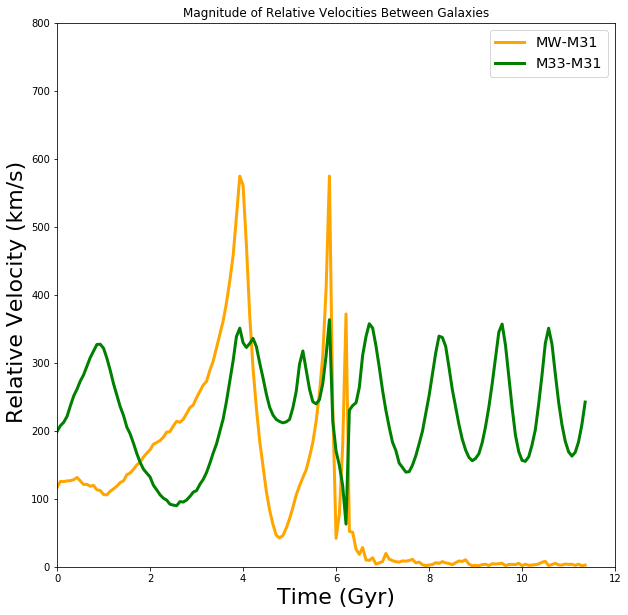

In [60]:
# Plot the orbital velocities of the galaxies 
#################################

#initialize plot
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

#plot the position separation between MW and M31 as a function of time
#note: the time is the same for each of the MW, M31, and M33 files
#      so can use MW_t for the time for each

plt.plot(MW_t, velmag_MWM31, color='orange', linewidth=3, label='MW-M31')

#plot the position separation between MW and M31 as a function of time
#note: the time is the same for each of the MW, M31, and M33 files
#      so can use MW_t for the time for each

plt.plot(MW_t, velmag_M33M31, color='green', linewidth=3, label='M33-M31')

#set plot title
plt.title('Magnitude of Relative Velocities Between Galaxies')

#set axes labels
plt.xlabel('Time (Gyr)', fontsize=22)
plt.ylabel(' Relative Velocity (km/s)', fontsize=22)

#set axes limits
plt.xlim(0,12)
plt.ylim(0,800)

#Create and Customize Label
ax.legend(loc='upper right', fontsize='x-large')

## Questions

### 1) How many close encounters will the MW and M31 experience in the future?
The MW and M31 will have 3 encounters before they merge on the third encounter.

### 2) How is the time evolution of the separation and relative velocities related?
As seperation increases relative velocity decreases and as seperation decreases relative velocity increases. From this I can conclude that they are inversely proportional.

### 3) When do M31 and the MW merge? What happens to M33's orbit when they merge?
M31 and MW will merge around 6.5Gyr. When they merge the orbit of M33 will alter from its slowly decaying orbit and will get closer to the merger (around 75kpc at the point of the merger) and then will begin decaying again.

### 4) What is roughly the decay rate of M33's orbit after 6Gyr. If this is const, how long will it take M33 to merge with the combined MW+M31 remnant if it is at a distance of 75kpc?
The decray rate is ~13.57kpc/Gyr. At this rate M33 will merge with the MW+M31 remnant after ~5.53Gyr.


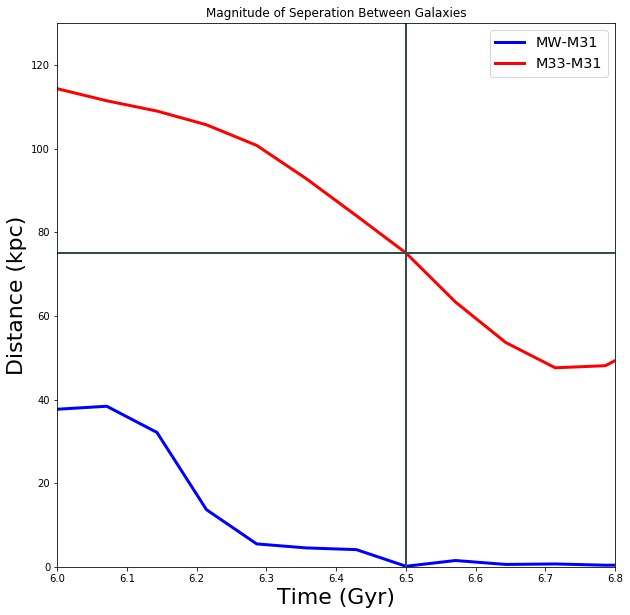

In [78]:
# ZOOM for Q3 --> Plot the Orbit of the galaxies 
#################################

#initialize plot
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

#plot the position separation between MW and M31 as a function of time
#note: the time is the same for each of the MW, M31, and M33 files
#      so can use MW_t for the time for each

plt.plot(MW_t, posmag_MWM31, color='blue', linewidth=3, label='MW-M31')

#plot the position separation between MW and M31 as a function of time
#note: the time is the same for each of the MW, M31, and M33 files
#      so can use MW_t for the time for each

plt.plot(MW_t, posmag_M33M31, color='red', linewidth=3, label='M33-M31')

#set plot title
plt.title('Magnitude of Seperation Between Galaxies')

#set axes labels
plt.xlabel('Time (Gyr)', fontsize=22)
plt.ylabel('Distance (kpc)', fontsize=22)

#set axes limits
plt.xlim(6.2,6.8)
plt.ylim(0,130)

#plot vertical line at the point of the MW and M31 merger
plt.axvline(x=6.5, color='darkslategrey', linewidth=2)

#plot horizontal line at the point of the MW and M31 merger
plt.axhline(y=75, color='darkslategrey', linewidth=2)

#Create and Customize Label
ax.legend(loc='upper right', fontsize='x-large')

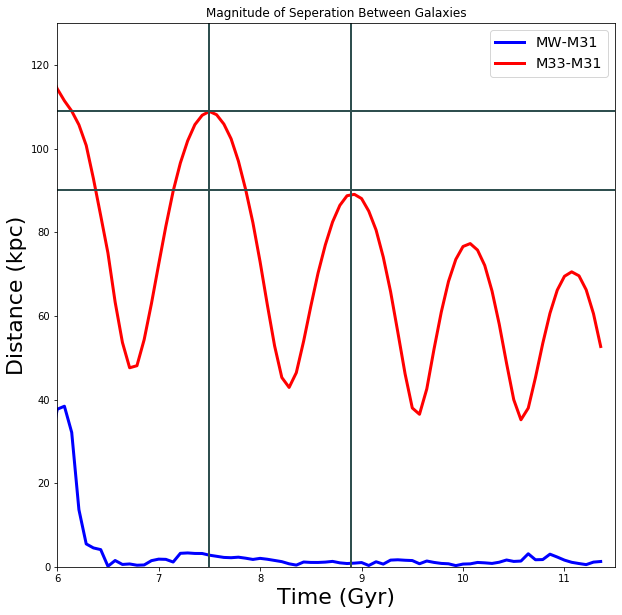

In [90]:
# ZOOM for Q4 --> Plot the Orbit of the galaxies 
#################################

#initialize plot
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

#plot the position separation between MW and M31 as a function of time
#note: the time is the same for each of the MW, M31, and M33 files
#      so can use MW_t for the time for each

plt.plot(MW_t, posmag_MWM31, color='blue', linewidth=3, label='MW-M31')

#plot the position separation between MW and M31 as a function of time
#note: the time is the same for each of the MW, M31, and M33 files
#      so can use MW_t for the time for each

plt.plot(MW_t, posmag_M33M31, color='red', linewidth=3, label='M33-M31')

#set plot title
plt.title('Magnitude of Seperation Between Galaxies')

#set axes labels
plt.xlabel('Time (Gyr)', fontsize=22)
plt.ylabel('Distance (kpc)', fontsize=22)

#set axes limits
plt.xlim(6,11.5)
plt.ylim(0,130)

#plot vertical lines
plt.axvline(x=7.5, color='darkslategrey', linewidth=2)
plt.axvline(x=8.9, color='darkslategrey', linewidth=2)

#plot horizontal lines
plt.axhline(y=109, color='darkslategrey', linewidth=2)
plt.axhline(y=90, color='darkslategrey', linewidth=2)

#Create and Customize Label
ax.legend(loc='upper right', fontsize='x-large')